In [1]:
# House Price Problem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy import stats
import warnings
import datetime as dt

%matplotlib notebook
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

In [2]:
# 데이터 가져오기
train_path = "./data/train.csv"
test_path = "./data/test.csv"

In [3]:
## train preprocessing
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
y_data = df_train['SalePrice']

In [7]:
# YearBuilt,YearRemodAdd,YrSold
Year_df = pd.DataFrame(df_train, columns=['Id','YearBuilt','YearRemodAdd','YrSold','SalePrice'])
Year_df.head()
# Year_df

,Id,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1,2003,2003,2008,208500
1,2,1976,1976,2007,181500
2,3,2001,2002,2008,223500
3,4,1915,1970,2006,140000
4,5,2000,2000,2008,250000


### YearBuilt

In [8]:
yearBulit_list = [str (i) for i in Year_df['YearBuilt']]
yearBulit_list[0]

'2003'

In [9]:
x_data = []
for idx,_ in enumerate(yearBulit_list):
    years = dt.datetime.strptime(yearBulit_list[idx], '%Y')
    x_data.append(years)

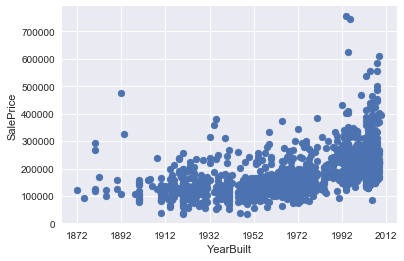

In [10]:
## YearBuilt
#plt.plot(x_data,y_data,linestyle='-',marker='*',label='SalePrice')
plt.scatter(x_data,y_data)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

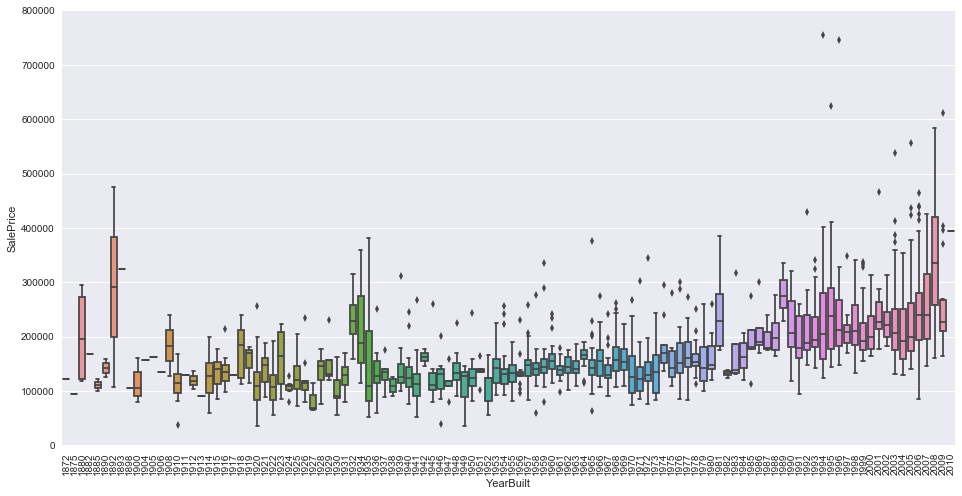

In [11]:
var = 'YearBuilt'
# data = pd.concat([YearBuilt_df['SalePrice'], YearBuilt_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=Year_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
# sns.distplot

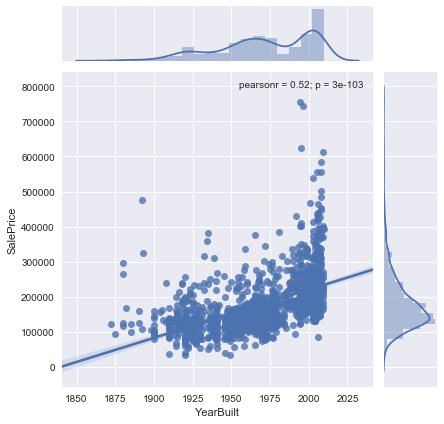

In [12]:
# sns.joinplot으로 보기
g = sns.jointplot(x = df_train['YearBuilt'], y = df_train['SalePrice'],kind="reg")

### YearRemodAdd

In [13]:
YearRemodAdd_list = [str (i) for i in Year_df['YearRemodAdd']]
# YearRemodAdd_list[0]
x_data = []
for idx,_ in enumerate(YearRemodAdd_list):
    years = dt.datetime.strptime(YearRemodAdd_list[idx], '%Y')
    x_data.append(years)

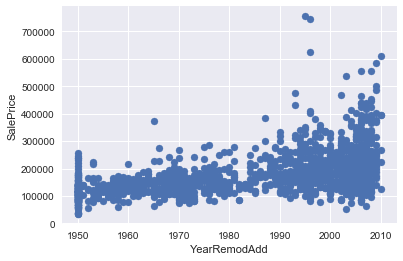

In [14]:
## YearRemodAdd
#plt.plot(x_data,y_data,linestyle='-',marker='*',label='SalePrice')
plt.scatter(x_data,y_data)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

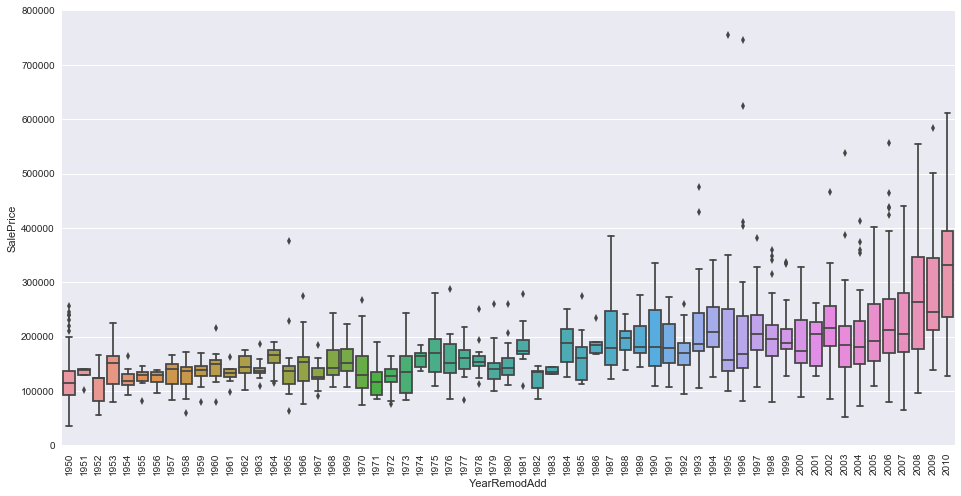

In [15]:
var = 'YearRemodAdd'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=Year_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

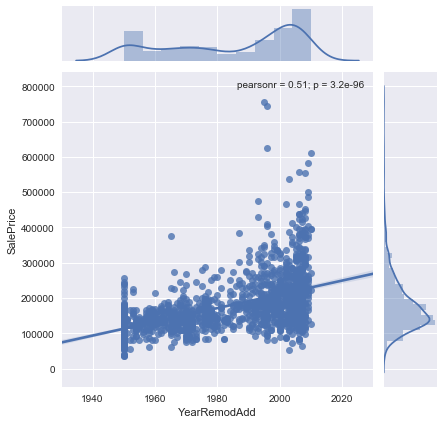

In [16]:
# sns.joinplot으로 보기
g = sns.jointplot(x = df_train['YearRemodAdd'], y = df_train['SalePrice'],kind="reg")

### YrSold

In [17]:
YrSold_list = [str (i) for i in Year_df['YrSold']]
x_data = []
for idx,_ in enumerate(YrSold_list):
    years = dt.datetime.strptime(YrSold_list[idx], '%Y')
    x_data.append(years)

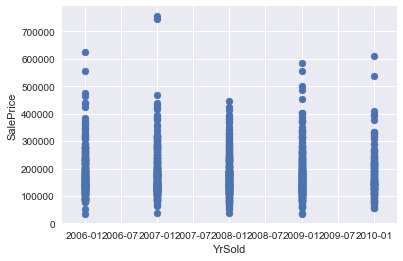

In [18]:
## YearRemodAdd
#plt.plot(x_data,y_data,linestyle='-',marker='*',label='SalePrice')
plt.scatter(x_data,y_data)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()

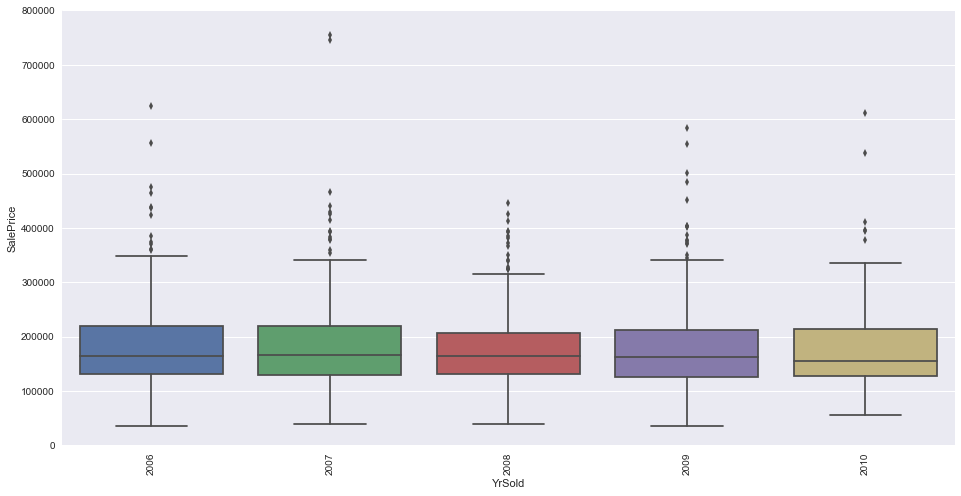

In [19]:
var = 'YrSold'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=Year_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
# sns.distplot

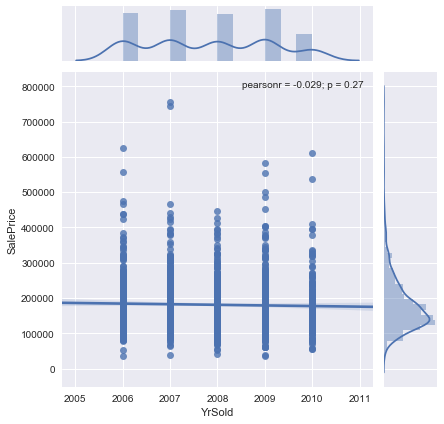

In [20]:
# 전체 train 데이터에서 
g = sns.jointplot(x = df_train['YrSold'], y = df_train['SalePrice'],kind="reg")

In [22]:
# Yrsold 변수 전처리 : (YrSold - YearBulit) 값을 처리하면 의미가 있을가?
yb = df_train['YearBuilt'].astype(int)
ys = df_train['YrSold'].astype(int)
ds = 'DiffSales'; 
df_train[ds]  = ys - yb

yb = Year_df['YearBuilt'].astype(int)
ys = Year_df['YrSold'].astype(int)
ds = 'DiffSales'; 
Year_df[ds]  = ys - yb

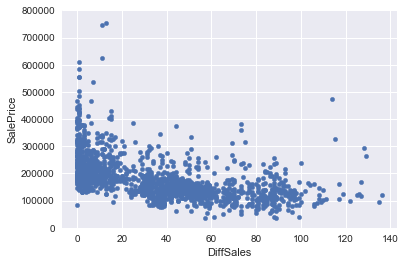

In [23]:
## Yrsold 변수 사용시 - 고재민
yb = df_train['YearBuilt'].astype(int)
ys = df_train['YrSold'].astype(int)
ds = 'DiffSales'; 
df_train[ds]  = ys - yb

#scatter plot totalbsmtsf/saleprice
data = pd.concat([ df_train['SalePrice'], df_train[ds]], axis=1)
data.plot.scatter(x=ds, y='SalePrice', ylim=(0,800000));

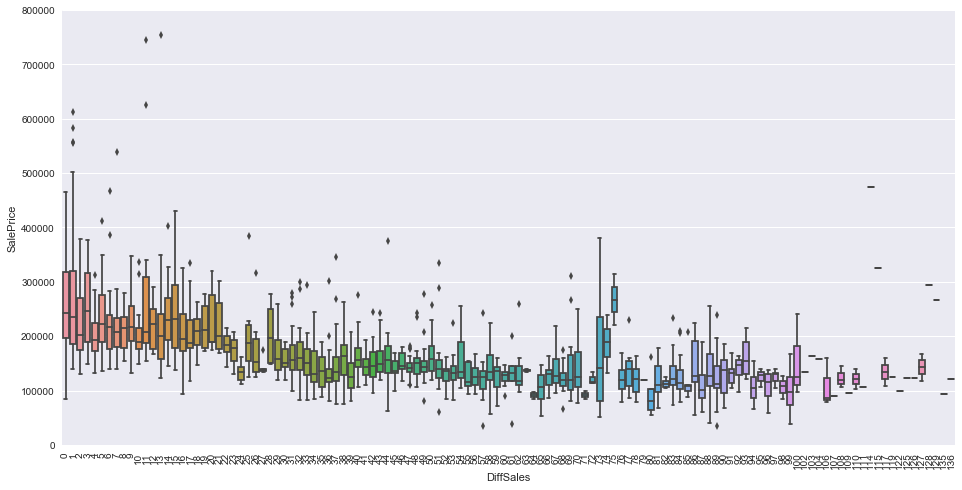

In [24]:
var = 'DiffSales'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=Year_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

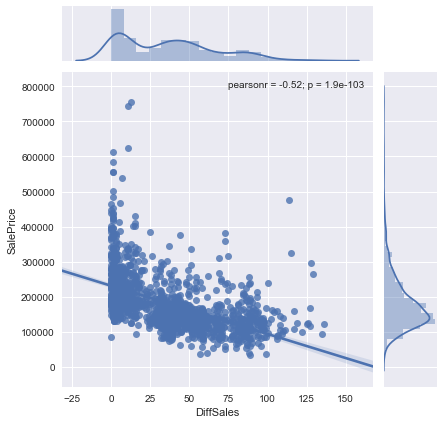

In [25]:
g = sns.jointplot(x = df_train['DiffSales'], y = df_train['SalePrice'],kind="reg")

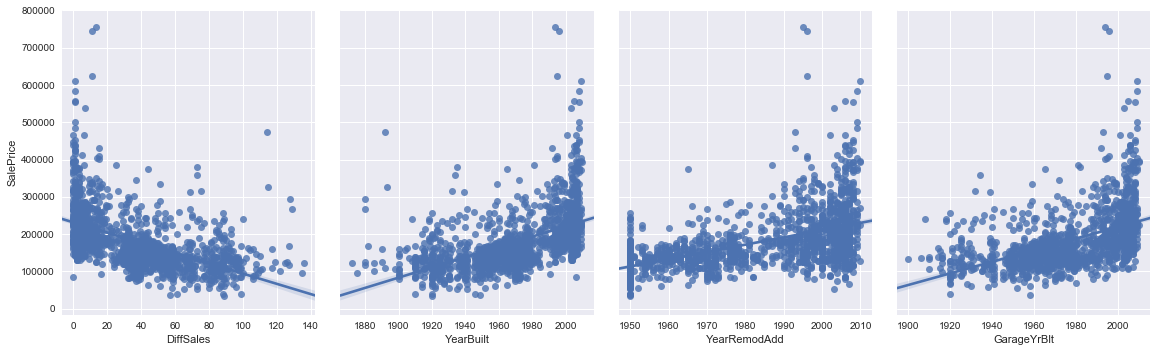

In [26]:
sns.pairplot(df_train, x_vars=["DiffSales", "YearBuilt","YearRemodAdd","GarageYrBlt"], y_vars=["SalePrice"],
            size=5, aspect=.8, kind="reg");

In [27]:
from statsmodels.formula.api import ols
time_df = pd.DataFrame(df_train, columns=['YearBuilt','YearRemodAdd','GarageYrBlt','DiffSales','SalePrice'])
model = ols("SalePrice ~ YearBuilt + YearRemodAdd + GarageYrBlt + DiffSales", time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     162.3
Date:                Fri, 06 Oct 2017   Prob (F-statistic):          8.09e-114
Time:                        18:44:02   Log-Likelihood:                -17241.
No. Observations:                1379   AIC:                         3.449e+04
Df Residuals:                    1374   BIC:                         3.452e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.984e+05   2.66e+06      0.150   

In [28]:
time_df = pd.DataFrame(df_train, columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','SalePrice'])
model = ols("SalePrice ~ YearBuilt + YearRemodAdd + GarageYrBlt + YrSold", time_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     162.3
Date:                Fri, 06 Oct 2017   Prob (F-statistic):          8.09e-114
Time:                        18:44:15   Log-Likelihood:                -17241.
No. Observations:                1379   AIC:                         3.449e+04
Df Residuals:                    1374   BIC:                         3.452e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.984e+05   2.66e+06      0.150   

## 년도에 대해서만 linear Regreesion

In [29]:
# YrSold 변수 포함: bulit 년도 와 sold 년도 차이.
yb = df_train['YearBuilt'].astype(int)
ys = df_train['YrSold'].astype(int)
ds = 'DiffSales'; 
df_train[ds]  = ys - yb

yb_test = df_test['YearBuilt'].astype(int)
ys_test = df_test['YrSold'].astype(int)
ds_test = 'DiffSales'; 
df_test[ds_test]  = ys_test - yb_test

In [30]:
# YearBuilt,YearRemodAdd
Year_df_train = pd.DataFrame(df_train, columns=['YearBuilt','YearRemodAdd','DiffSales','SalePrice'])
Year_df_train.head()
Year_df_test = pd.DataFrame(df_test, columns=['YearBuilt','YearRemodAdd','DiffSales','SalePrice'])
Year_df_test.head()

,YearBuilt,YearRemodAdd,DiffSales,SalePrice
0,2003,2003,5,208500
1,1976,1976,31,181500
2,2001,2002,7,223500
3,1915,1970,91,140000
4,2000,2000,8,250000


,YearBuilt,YearRemodAdd,DiffSales,SalePrice
0,1961,1961,49,NaN
1,1958,1958,52,NaN
2,1997,1998,13,NaN
3,1998,1998,12,NaN
4,1992,1992,18,NaN


In [31]:
train_x = Year_df_train.drop('SalePrice',axis=1)
train_y = Year_df_train['SalePrice']

# train 데이터와 test 데이터를 합침.
year_data = pd.concat([train_x, Year_df_test])

In [32]:
categorical = []
numerical = []
for feature in year_data.columns:
    if year_data[feature].dtype == 'object':
        # 범주형 변수
        categorical.append(feature)
    else:
        # 숫자형 변수
        numerical.append(feature)

nu_df = year_data[numerical]
nu_df = nu_df.fillna(0) # 결측값 0처리
ca_df = pd.DataFrame()

for element in categorical:
    ca_df = pd.concat([ca_df,pd.get_dummies(all_data[element])], axis=1)
# len(categorical)

In [33]:
new_x = pd.concat([nu_df, ca_df], axis=1) # 결측값 처리한 데이터를 나눔.
train_x = new_x.iloc[:1460,:] # 다시 train

test_x = new_x.iloc[1460:,:] # 나머지 test

In [34]:
# Logistic regression 모델링 수행.
lr = LinearRegression().fit(train_x, train_y)
pred = lr.predict(test_x)

In [208]:
#output_path = "./submit/linear_regression(year)_summary1.csv"
output_path = "./submit/linear_regression(year)_summary2.csv" # yrsold
solution = pd.DataFrame({"SalePrice":pred,"Id": df_test.Id})
solution.columns
#solution
#solution = solution.sort_index(axis=1,ascending=False) 
solution.to_csv(output_path, index=False)

Index(['Id', 'SalePrice'], dtype='object')

## 년도(diffsalse 처리후) Lasso&Ridge Regression

In [49]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

train_data = df_train.loc[:,'MSSubClass':'SaleCondition']
test_data = df_test.loc[:,'MSSubClass':'SaleCondition']
# YrSold 변수 포함: bulit 년도 와 sold 년도 차이.
yb = train_data['YearBuilt'].astype(int)
ys = train_data['YrSold'].astype(int)
ds = 'DiffSales'; 
train_data[ds]  = ys - yb

yb_test = test_data['YearBuilt'].astype(int)
ys_test = test_data['YrSold'].astype(int)
ds = 'DiffSales'; 
test_data[ds]  = ys_test - yb_test

In [50]:
df_train.head()
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DiffSales
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8


In [51]:
#데이터 머징
all_data = pd.concat((train_data.loc[:,'MSSubClass':'DiffSales'],
                      test_data.loc[:,'MSSubClass':'DiffSales']))

In [52]:
#타겟 변수 로그 변환
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])


# 카테고리 변수 변환 : MSSubClass
categorical = []
numerical = []

for feature in all_data.columns:
    if all_data[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

len(numerical)
len(categorical)

del(numerical[numerical.index('MSSubClass')])
categorical.append('MSSubClass')

len(numerical)
len(categorical)

nu_df = all_data[numerical]
nu_df = nu_df.fillna(0)
ca_df = pd.DataFrame()

## (수치형 변수 - 평균) / 분산  방법으로 정규화
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
nu_df = normalize(nu_df)
################################################
## Test의 카테고리가 Train에 없는 변수 찾기
mismatch = []
for element in categorical:
    train_length = pd.get_dummies(train_data[element]).shape[1]
    test_length = pd.get_dummies(test_data[element]).shape[1]
    if train_length != test_length:
        mismatch.append(element)
categorical = list(set(categorical)-set(mismatch))
################################################

for element in categorical:
    ca_df = pd.concat([ca_df,pd.get_dummies(all_data[element])], axis=1)

new_x = pd.concat([nu_df, ca_df], axis=1)
train_x = new_x.iloc[:1460,:]
test_x = new_x.iloc[1460:,:]

#왜도인 numeric features 로그 변환
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

37

43

36

44

In [53]:
#더미 변수 생성
all_data = pd.get_dummies(all_data)

In [58]:
#missing value 처리
all_data = all_data.fillna(all_data.mean())

In [59]:
#train data set과 test data set 분류
X_train = all_data[:train_data.shape[0]]
X_test = all_data[train_data.shape[0]:]
y = df_train.SalePrice

In [60]:
#rmse 반환 함수
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

### Ridge Model

In [61]:
model_ridge = Ridge()

In [62]:
#최적 alpha 찾기
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge

[0.13893637698935415,
 0.13777538273907614,
 0.1350143360672551,
 0.13136185656306548,
 0.12864897924538884,
 0.12782191867332934,
 0.12733767608212693,
 0.12752997217784184,
 0.12896022596058326,
 0.13099676668274948,
 0.13316730358650494]

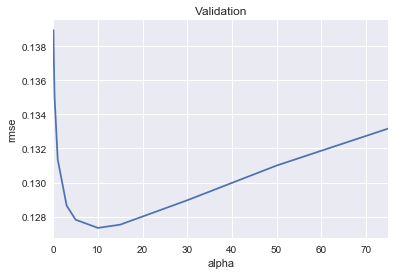

In [63]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [64]:
cv_ridge.min()

0.12733767608212693

In [65]:
# Ridge Model
model_ridge = RidgeCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]).fit(X_train, y)
rmse_cv(model_ridge).mean()

0.12775941605813484

In [66]:
ridge_preds = np.expm1(model_ridge.predict(X_test))
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":ridge_preds})
solution = solution.sort_index(axis=1, ascending=False)
solution.to_csv("./submit/2_Ridge(summary)_20171006.csv", index=False)

### Lasso Model

In [67]:
model_lasso = LassoCV(alphas=[1,0.1, 0.001, 0.0005, 0.0001]).fit(X_train,y)
rmse_cv(model_lasso).mean()

0.1231489230007812

In [68]:
#Lasso model이 선택한 feature의 수알아보기
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 178 variables


In [70]:
lasso_preds = np.expm1(model_ridge.predict(X_test))
solution = pd.DataFrame({"id":df_test.Id, "SalePrice":lasso_preds})
solution = solution.sort_index(axis=1, ascending=False)
solution.to_csv("./submit/2_Lasso(summary)_20171006.csv", index=False)

## 변수 전처리 후 RandomForest 모델
- 수치형 변수 Normalization
- test의 범주형 변수 값이 traine에 없는 변수들 제거.
- random forest 모델의 Tree 수 100~3000개까지 100개단위로 탐색.

In [36]:
# 데이터 가져오기
train_path = "./data/train.csv"
test_path = "./data/test.csv"

In [37]:
## train preprocessing
raw_train_data = pd.read_csv(train_path)
raw_test_data = pd.read_csv(test_path)

In [38]:
# 결측값 처리 전 data 확인
raw_train_data.head()
raw_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [39]:
# 결측값 처리 : train
total = raw_train_data.isnull().sum().sort_values(ascending=False)
percent_train = (raw_train_data.isnull().sum()/raw_train_data.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent_train], axis=1, keys=['Total', 'Percent_train'])
# missing_data_test.head(20)
# 결측값 비율 15% 이상인것은 변수 제외:
train_features = missing_data_train.loc[missing_data_train.Percent_train < 0.15]
train_features.axes
new_train = pd.DataFrame(raw_train_data, columns=['Id','GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
        'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
        'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
        'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
        'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
        'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
        'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
        'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
        'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
        'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',
        'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath',
        'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'CentralAir',
        'SaleCondition', 'Heating', 'TotalBsmtSF', 'SalePrice'])
new_train.head()

[Index(['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
        'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
        'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
        'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
        'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
        'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
        'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
        'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
        'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
        'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',
        'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'Bs

,Id,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,...,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,SalePrice
0,1,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,...,1,1710,0,854,856,Y,Normal,GasA,856,208500
1,2,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,...,0,1262,0,0,1262,Y,Normal,GasA,1262,181500
2,3,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,...,1,1786,0,866,920,Y,Normal,GasA,920,223500
3,4,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,...,1,1717,0,756,961,Y,Abnorml,GasA,756,140000
4,5,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,...,1,2198,0,1053,1145,Y,Normal,GasA,1145,250000


In [41]:
# 결측값 처리 : test
total = raw_test_data.isnull().sum().sort_values(ascending=False)
percent_test = (raw_test_data.isnull().sum()/raw_test_data.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent_test], axis=1, keys=['Total', 'Percent_test'])
# missing_data_test.head(20)
# 결측값 비율 15% 이상인것은 변수 제외:
test_features = missing_data_test.loc[missing_data_test.Percent_test < 0.15]
test_features.axes
new_test = pd.DataFrame(raw_test_data,columns=['Id','GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
        'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
        'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
        'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
        'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
        'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
        'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
        'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
        'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
        'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',
        'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath',
        'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'CentralAir',
        'SaleCondition', 'Heating', 'TotalBsmtSF'])
new_test.head()

[Index(['GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType',
        'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Utilities',
        'Functional', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd',
        'BsmtUnfSF', 'TotalBsmtSF', 'SaleType', 'Exterior1st', 'KitchenQual',
        'GarageArea', 'GarageCars', 'HouseStyle', 'LandSlope', 'MSSubClass',
        'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'Neighborhood', 'BldgType', 'Condition1', 'Condition2', 'RoofMatl',
        'RoofStyle', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual',
        'SaleCondition', 'Heating', 'ExterQual', 'TotRmsAbvGrd', 'YrSold',
        'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch',
        'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'PavedDrive',
        'Fireplaces', 'KitchenAbvGr', 'ExterCond', 'BedroomAbvGr', 'HalfBath',
        'F

,Id,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,...,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF
0,1461,TA,Attchd,1961.0,Unf,TA,No,LwQ,Rec,TA,...,0.0,0.0,896,0,0,896,Y,Normal,GasA,882.0
1,1462,TA,Attchd,1958.0,Unf,TA,No,Unf,ALQ,TA,...,0.0,0.0,1329,0,0,1329,Y,Normal,GasA,1329.0
2,1463,TA,Attchd,1997.0,Fin,TA,No,Unf,GLQ,TA,...,0.0,0.0,1629,0,701,928,Y,Normal,GasA,928.0
3,1464,TA,Attchd,1998.0,Fin,TA,No,Unf,GLQ,TA,...,0.0,0.0,1604,0,678,926,Y,Normal,GasA,926.0
4,1465,TA,Attchd,1992.0,RFn,TA,No,Unf,ALQ,TA,...,0.0,0.0,1280,0,0,1280,Y,Normal,GasA,1280.0


In [43]:
##>> 여기서부터 시작해야됨!(결측값 비율 제거후)
new_train_x_without_train_y = new_train.loc[:,'Id':'Heating']
new_train_data = new_train.loc[:,'GarageCond':'Heating']
new_test_data = new_test.loc[:,'GarageCond':'Heating']
new_train_y = new_train['SalePrice']

new_all_data = pd.concat([new_train_x_without_train_y, new_test_data])

In [45]:
new_train_x_without_train_y.head()
new_all_data.head()

,Id,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,...,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating
0,1,TA,Attchd,2003.0,RFn,TA,No,Unf,GLQ,TA,...,2,0,1,1710,0,854,856,Y,Normal,GasA
1,2,TA,Attchd,1976.0,RFn,TA,Gd,Unf,ALQ,TA,...,2,1,0,1262,0,0,1262,Y,Normal,GasA
2,3,TA,Attchd,2001.0,RFn,TA,Mn,Unf,GLQ,TA,...,2,0,1,1786,0,866,920,Y,Normal,GasA
3,4,TA,Detchd,1998.0,Unf,TA,No,Unf,ALQ,Gd,...,1,0,1,1717,0,756,961,Y,Abnorml,GasA
4,5,TA,Attchd,2000.0,RFn,TA,Av,Unf,GLQ,TA,...,2,0,1,2198,0,1053,1145,Y,Normal,GasA


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,208500.0,WD,0,Pave,8,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,181500.0,WD,0,Pave,6,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,223500.0,WD,0,Pave,6,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,140000.0,WD,0,Pave,7,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,250000.0,WD,0,Pave,9,AllPub,192,2000,2000,2008


In [47]:
categorical = []
numerical = []

for feature in new_all_data.columns:
    if new_all_data[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

len(numerical)
len(categorical)

del(numerical[numerical.index('MSSubClass')])
categorical.append('MSSubClass')

len(numerical)
len(categorical)

nu_df = new_all_data[numerical]
nu_df = nu_df.fillna(0)
ca_df = pd.DataFrame()

## (수치형 변수 - 평균) / 분산  방법으로 정규화
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
nu_df = normalize(nu_df)
################################################

## Test의 카테고리가 Train에 없는 변수 찾기
mismatch = []
for element in categorical:
    train_length = pd.get_dummies(new_train_data[element]).shape[1]
    test_length = pd.get_dummies(new_test_data[element]).shape[1]
    if train_length != test_length:
        mismatch.append(element)
categorical = list(set(categorical)-set(mismatch))
################################################

for element in categorical:
    ca_df = pd.concat([ca_df,pd.get_dummies(new_all_data[element])], axis=1)

new_x = pd.concat([nu_df, ca_df], axis=1)
train_x = new_x.iloc[:1460,:]
test_x = new_x.iloc[1460:,:]

36

38

35

39

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


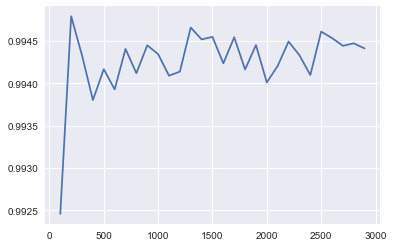

In [49]:
## hyper_parameter 탐색
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, new_train_y, test_size=0.3, random_state=0)
tmp = 0
score = []
hyper_param = []
for i in range(100,3000,100):
    lr = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    model_score = lr.score(X_test,y_test)
    score.append(model_score)
    hyper_param.append(i)
    print(i)
plt.plot(hyper_param, score)

In [53]:
## modeling
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators=hyper_param[score.index(max(score))]).fit(train_x,new_train_y)
# lr = LinearRegression().fit(train_x, train_y)
# lr = Ridge().fit(train_x, train_y)
pred = lr.predict(test_x)
pred
## 예측값이 모두 양수인지 확인
# np.savetxt(output_path, pred)

array([[ 38646.745,  38646.745],
       [ 38616.31 ,  38616.31 ],
       [ 38970.84 ,  38970.84 ],
       ..., 
       [ 38188.73 ,  38188.73 ],
       [ 39145.77 ,  39145.77 ],
       [ 38419.95 ,  38419.95 ]])

In [52]:
solution = pd.DataFrame({"id":raw_test_data.Id, "SalePrice":pred})
solution = solution.sort_index(axis=1, ascending=False)
solution.to_csv("./submit/3_RandomForest(summary)_20171018(결측값처리).csv", index=False)

Exception: Data must be 1-dimensional

## 변수처리 후 RANDOMFOREST 모델(결측값처리 제외)

In [ ]:
## train preprocessing
raw_train_data = pd.read_csv(train_path)
raw_test_data = pd.read_csv(test_path)

In [ ]:
# 결측값 처리 전 data 확인
raw_train_data.head()
raw_test_data.head()

In [ ]:
##>> 여기서부터 시작해야됨!(결측값 비율 제거후)
#train_x_without_train_y = raw_train_data.drop('SalePrice', axis=1)
train_x_without_train_y = raw_train_data.loc[:,'Id':'SaleCondition']
#raw_train_data = raw_train_data.drop('Id',axis=1)
train_data = raw_train_data.loc[:,'MSSubClass':'SaleCondition']
test_data = raw_test_data.loc[:,'MSSubClass':'SaleCondition']
train_y = raw_train_data['SalePrice']

all_data = pd.concat([train_x_without_train_y, test_data])

In [7]:
# YrSold 변수 추가: (YearBuilt-Yrsold) 년도 차이.
# '''yb = raw_train_data['YearBuilt'].astype(int)
# ys = raw_train_data['YrSold'].astype(int)
# ds = 'DiffSales'; 
# raw_train_data[ds]  = ys - yb

# yb_test = raw_test_data['YearBuilt'].astype(int)
# ys_test = raw_test_data['YrSold'].astype(int)
# ds = 'DiffSales'; 
# raw_test_data[ds]  = ys_test - yb_test

#train_x_without_train_y = raw_train_data.drop('SalePrice', axis=1)
train_x_without_train_y = raw_train_data.loc[:,'Id':'SaleCondition']
#raw_train_data = raw_train_data.drop('Id',axis=1)
train_data = raw_train_data.loc[:,'MSSubClass':'SaleCondition']
test_data = raw_test_data.loc[:,'MSSubClass':'SaleCondition']
train_y = raw_train_data['SalePrice']

all_data = pd.concat([train_x_without_train_y, test_data])

In [9]:
train_x_without_train_y.head()
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [97]:
categorical = []
numerical = []

for feature in all_data.columns:
    if all_data[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

len(numerical)
len(categorical)

del(numerical[numerical.index('MSSubClass')])
categorical.append('MSSubClass')

len(numerical)
len(categorical)

nu_df = all_data[numerical]
nu_df = nu_df.fillna(0)
ca_df = pd.DataFrame()

## (수치형 변수 - 평균) / 분산  방법으로 정규화
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
nu_df = normalize(nu_df)
################################################

## Test의 카테고리가 Train에 없는 변수 찾기
mismatch = []
for element in categorical:
    train_length = pd.get_dummies(train_data[element]).shape[1]
    test_length = pd.get_dummies(test_data[element]).shape[1]
    if train_length != test_length:
        mismatch.append(element)
categorical = list(set(categorical)-set(mismatch))
################################################

for element in categorical:
    ca_df = pd.concat([ca_df,pd.get_dummies(all_data[element])], axis=1)

new_x = pd.concat([nu_df, ca_df], axis=1)
train_x = new_x.iloc[:1460,:]
test_x = new_x.iloc[1460:,:]

37

43

36

44

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


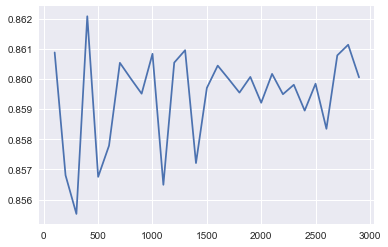

In [98]:
## hyper_parameter 탐색
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
tmp = 0
score = []
hyper_param = []
for i in range(100,3000,100):
    lr = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    model_score = lr.score(X_test,y_test)
    score.append(model_score)
    hyper_param.append(i)
    print(i)
plt.plot(hyper_param, score)

In [99]:
## modeling
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators=hyper_param[score.index(max(score))]).fit(train_x,train_y)
# lr = LinearRegression().fit(train_x, train_y)
# lr = Ridge().fit(train_x, train_y)
pred = lr.predict(test_x)
## 예측값이 모두 양수인지 확인
all(pred>0)
# np.savetxt(output_path, pred)

True

In [100]:
solution = pd.DataFrame({"id":raw_test_data.Id, "SalePrice":pred})
solution = solution.sort_index(axis=1, ascending=False)
solution.to_csv("./submit/3_RandomForest(summary)_20171006(년차변수제거).csv", index=False)